In [144]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The following settings will improve the default style and font sizes for our charts.

In [145]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [146]:
# https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction/data
real_estate_df = pd.read_csv("Real estate.csv")
real_estate_df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [147]:
real_estate_df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [148]:
real_estate_copy_df = real_estate_df.drop('X1 transaction date', axis=1)
real_estate_copy_df

,No,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,410,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,8.1,104.81010,5,24.96674,121.54067,52.5


In [149]:
real_estate_copy_df.set_index('No', inplace=True)


In [150]:
real_estate_copy_df = real_estate_copy_df.rename(columns={
    'X2 house age': 'house_age',
    'X3 distance to the nearest MRT station': 'distance_to_the_nearest_MRT_station',
    'X4 number of convenience stores': 'number_of_convenience_stores',
    'Y house price of unit area': 'price_of_unit_area',
    'X6 longitude': 'longitude',
    'X5 latitude': 'latitude'
})
real_estate_copy_df

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,price_of_unit_area
No,,,,,,
1,32.0,84.87882,10,24.98298,121.54024,37.9
2,19.5,306.59470,9,24.98034,121.53951,42.2
3,13.3,561.98450,5,24.98746,121.54391,47.3
4,13.3,561.98450,5,24.98746,121.54391,54.8
5,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
410,13.7,4082.01500,0,24.94155,121.50381,15.4
411,5.6,90.45606,9,24.97433,121.54310,50.0
412,18.8,390.96960,7,24.97923,121.53986,40.6


The dataset contains 414 rows and 7 columns. Each row of the dataset contains information about one house. 

Our objective is to find a way to estimate the value in the "house price of unit area" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new houses too, simply by asking for information like their house age, distance to the nearest MRT station, number of convenience stores, latitude, longitude 

Let's check the data type for each column.

In [151]:
real_estate_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 1 to 414
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   house_age                            414 non-null    float64
 1   distance_to_the_nearest_MRT_station  414 non-null    float64
 2   number_of_convenience_stores         414 non-null    int64  
 3   latitude                             414 non-null    float64
 4   longitude                            414 non-null    float64
 5   price_of_unit_area                   414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 22.6 KB


Looks like "house_age", "distance_to_the_nearest_MRT_station", "latitude", longitude", "price_of_unit_area" are decimals, whereas "number_of_convenience_stores" are integers. None of the columns contain any missing values, which saves us a fair bit of work!

Here are some statistics for the numerical columns:

In [152]:
real_estate_copy_df.describe()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,price_of_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


The mean price of unit area is approximately 37.98.
The median price of unit area is 38.45.
Since the mean and median are relatively close in value, it suggests that the distribution may be approximately symmetrical or have a slight skew. 

## Exploratory Analysis and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "price_of_unit_area" and other columns.

### House_age

In [153]:
real_estate_copy_df['house_age'].describe()

count    414.000000
mean      17.712560
std       11.392485
min        0.000000
25%        9.025000
50%       16.100000
75%       28.150000
max       43.800000
Name: house_age, dtype: float64

A minimum house age of 0, which means a very new house and maximum age of 43yrs. We can visualize the distribution of age using a histogram with 44 bins (one for each house)

In [154]:
fig = px.histogram(real_estate_copy_df, 
                   x='house_age', 
                   marginal='box', 
                   nbins=44, 
                   title='Distribution of House Age')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of house age appears to be right-skewed, as the frequency of houses decreases as the age increases. This is evident from the decreasing trend in frequencies across the bins and outliers in the 40-45yrs range.

In [155]:

# Calculate the histogram data
# house_age_data = real_estate_copy_df['house_age']
# house_age_bins = np.histogram_bin_edges(house_age_data, bins=45)
# house_age_counts, _ = np.histogram(house_age_data, bins=house_age_bins)

# Create a DataFrame for the histogram data
# histogram_data = pd.DataFrame({
#     'Bin': house_age_bins[:-1],
#     'Frequency': house_age_counts
# })

# Display the histogram data as a table
# display(histogram_data)

In [156]:
real_estate_copy_df.columns

Index(['house_age', 'distance_to_the_nearest_MRT_station',
       'number_of_convenience_stores', 'latitude', 'longitude',
       'price_of_unit_area'],
      dtype='object')

### Distance_to_the_nearest_MRT_station
The Mass Rapid Transit (MRT) system is a rail network that is the backbone of Singapore's public transport system

In [157]:
real_estate_copy_df['distance_to_the_nearest_MRT_station'].describe()

count     414.000000
mean     1083.885689
std      1262.109595
min        23.382840
25%       289.324800
50%       492.231300
75%      1454.279000
max      6488.021000
Name: distance_to_the_nearest_MRT_station, dtype: float64

In [158]:
fig = px.histogram(real_estate_copy_df, 
                   x='distance_to_the_nearest_MRT_station', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of distance_to_the_nearest_MRT_station')
fig.update_layout(bargap=0.1)
fig.show()

The distribution for distance_to_the_nearest_MRT_station is right skewed with most of the houses in the 0-500km range ie. closer to an MRT station, small number of outliers in the far right

In [159]:
real_estate_copy_df.columns

Index(['house_age', 'distance_to_the_nearest_MRT_station',
       'number_of_convenience_stores', 'latitude', 'longitude',
       'price_of_unit_area'],
      dtype='object')

### Number_of_convenience_stores

In [160]:
real_estate_copy_df['number_of_convenience_stores'].describe()

count    414.000000
mean       4.094203
std        2.945562
min        0.000000
25%        1.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: number_of_convenience_stores, dtype: float64

In [161]:
fig = px.histogram(real_estate_copy_df, 
                   x='number_of_convenience_stores', 
                   marginal='box', 
                   color_discrete_sequence=['purple'], 
                   title='Distribution of number_of_convenience_stores')
fig.update_layout(bargap=0.1)
fig.show()

A bimodal distribution indicates the presence of two distinct peaks or modes in the data. In this case, we can see that the data is divided into two peaks: one around 0 and another around 5.

The first peak, centered around 0, represents properties with no nearby convenience stores. The high frequency count of 67 suggests that a significant portion of the dataset consists of properties with no convenience stores in close proximity.

The second peak, centered around 5, represents properties with a higher number of convenience stores nearby. The frequency count of 67 also indicates a considerable number of properties within this range.

The presence of these two distinct peaks suggests that the dataset contains two main groups of properties: one group with no convenience stores nearby and another group with a moderate number of convenience stores. This bimodal distribution provides valuable insights into the distribution of the number of convenience stores and highlights the presence of these two distinct categories within the dataset. Most (about 75%) of the properties have less than 6 convenience stores nearby

In [163]:
real_estate_copy_df.columns

Index(['house_age', 'distance_to_the_nearest_MRT_station',
       'number_of_convenience_stores', 'latitude', 'longitude',
       'price_of_unit_area'],
      dtype='object')

### Latitude and Longitude

In [164]:
real_estate_copy_df['latitude'].describe()

count    414.000000
mean      24.969030
std        0.012410
min       24.932070
25%       24.963000
50%       24.971100
75%       24.977455
max       25.014590
Name: latitude, dtype: float64

In [165]:
real_estate_copy_df['longitude'].describe()

count    414.000000
mean     121.533361
std        0.015347
min      121.473530
25%      121.528085
50%      121.538630
75%      121.543305
max      121.566270
Name: longitude, dtype: float64

In [166]:

# Create a scatter plot using Plotly
fig = px.scatter(real_estate_copy_df, x='lo', y='latitude')

# Customize the scatter plot
fig.update_layout(
    title="Scatter Plot of Longitude and Latitude",
    xaxis_title="Longitude",
    yaxis_title="Latitude"
)

# Display the scatter plot
fig.show()

The majority of properties are situated near the coordinates of 121.54 longitude and 24.97 latitude. An increase in longitude indicates a shift towards the east, while an increase in latitude suggests a movement towards the north.

In [205]:
real_estate_copy_df.columns

Index(['house_age', 'distance_to_the_nearest_MRT_station',
       'number_of_convenience_stores', 'latitude', 'longitude',
       'price_of_unit_area'],
      dtype='object')

Price_of_unit_area

In [168]:
real_estate_copy_df['price_of_unit_area'].describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: price_of_unit_area, dtype: float64

In [169]:
fig = px.histogram(real_estate_copy_df, 
                   x='price_of_unit_area', 
                   marginal='box', 
                   color_discrete_sequence=['green'], 
                   title='Distribution of price_of_unit_area')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of Price of the unit area is slightly right skewed with one outlier
Almost 75% of the data falls below  SGD 47

Having looked at individual columns, we can now visualize the relationship between "price_of_unit_area" (the value we wish to predict) and other columns

In [170]:
real_estate_copy_df.columns

Index(['house_age', 'distance_to_the_nearest_MRT_station',
       'number_of_convenience_stores', 'latitude', 'longitude',
       'price_of_unit_area'],
      dtype='object')

1. Price_of_unit_area and House_age
2. Price_of_unit_area and Distance_to_the_nearest_MRT_station
3. Price_of_unit_area and Number_of_convenience_stores
4. Price_of_unit_area and Longitude
5. Price_of_unit_area and Latitude

### Price_of_unit_price and House_age
Let's visualize the relationship between "House_age" and "Price_of_unit_price" using a scatter plot. Each point in the scatter plot represents one property. 

In [171]:
fig = px.scatter(real_estate_copy_df,
                 x='house_age', 
                 y='price_of_unit_area', 
                 opacity=0.8, 
                 hover_data=['longitude', 'latitude'], 
                 title='house_age vs. price_of_unit_area')
fig.update_traces(marker_size=5)
fig.show()

It appears that an increase in house_age is corresponds to a slight decrease in price

### Price_of_unit_price and Distance_to_the_nearest_MRT_station

In [172]:
fig = px.scatter(real_estate_copy_df,
                 x='distance_to_the_nearest_MRT_station', 
                 y='price_of_unit_area', 
                 opacity=0.8, 
                 hover_data=['longitude', 'latitude'], 
                 title='distance_to_the_nearest_MRT_station vs. price_of_unit_area')
fig.update_traces(marker_size=5)
fig.show()

It appears that the nearer the property is towards an MRT station the higher the price and vice-versa

### Price_of_unit_price and Distance_to_the_nearest_MRT_station

In [173]:

fig = px.violin(real_estate_copy_df,
                 x='number_of_convenience_stores', 
                 y='price_of_unit_area',  
                 hover_data=['longitude', 'latitude'], 
                 title='number_of_convenience_stores vs. price_of_unit_area')
fig.update_traces(marker_size=5)
fig.show()

There's an increase in price as the number of convenient stores increase

### Price_of_unit_price and longitude

In [174]:
fig = px.scatter(real_estate_copy_df,
                 x='longitude', 
                 y='price_of_unit_area', 
                 opacity=0.8, 
                 title='longitude vs. price_of_unit_area')
fig.update_traces(marker_size=5)
fig.show()

It appears that there is an increase in price as longitude increases, but are more clustered around 121.54

### Price_of_unit_price and latitude

In [175]:
fig = px.scatter(real_estate_copy_df,
                 x='latitude', 
                 y='price_of_unit_area', 
                 opacity=0.8, 
                 title='latitude vs. price_of_unit_area')
fig.update_traces(marker_size=5)
fig.show()

It appears that an increase in latitude is related to an increase in price_of_unit_area, with a cluster around latitude 24.96 - 24.98

### Correlation

The relationship is often expressed numerically using a measure called the _correlation coefficient_, which can be computed using the `.corr` method of a Pandas series. Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.

In [176]:
real_estate_copy_df.corr()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,price_of_unit_area
house_age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance_to_the_nearest_MRT_station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
number_of_convenience_stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
price_of_unit_area,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


The result of `.corr` is called a correlation matrix and is often visualized using a heatmap.

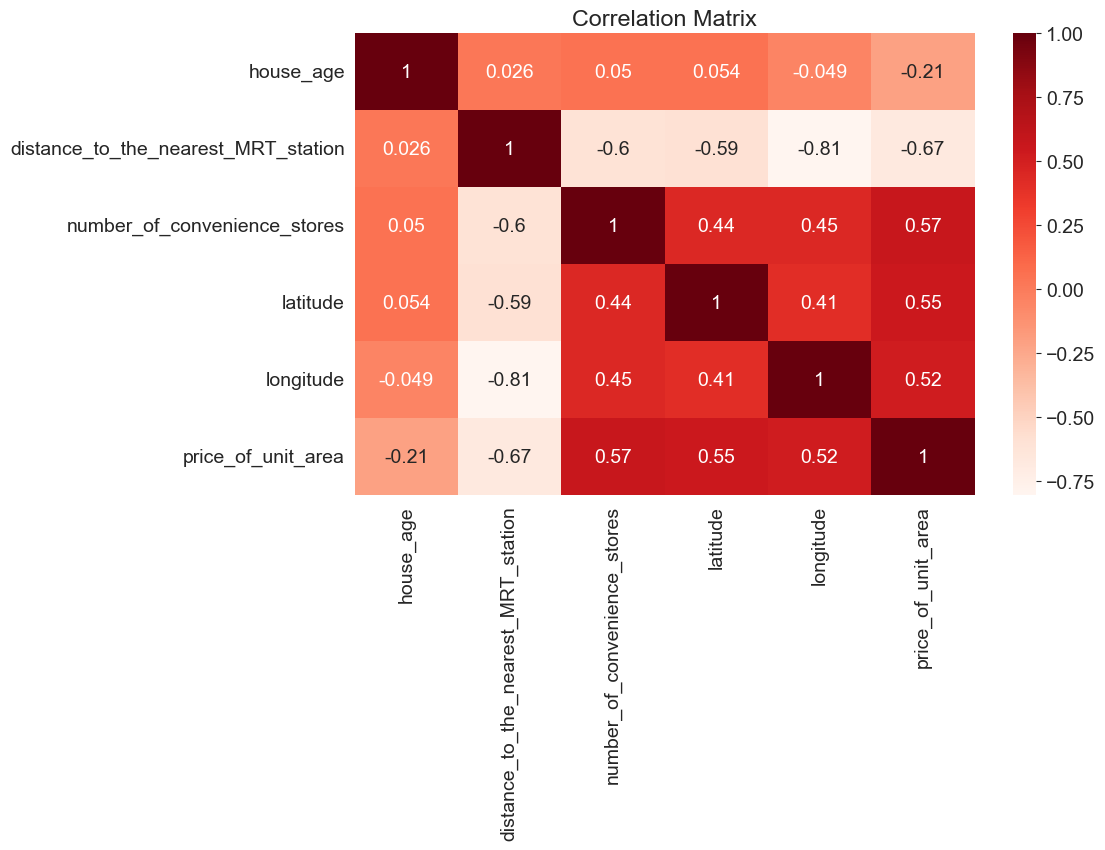

In [177]:
sns.heatmap(real_estate_copy_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

The correlation coefficient measures the strength and direction of the linear relationship between two variables. In this case, the correlation coefficient represents the relationship between the "Price_of_unit_area" and each of the following variables:

### Price_of_unit_area and House_age = -0.21

A correlation coefficient of -0.21 suggests a moderately negative correlation between the price of a unit area and the house age.
This means that as the age of the house increases, the price of a unit area tends to decrease, but the relationship is not very strong.

### Price_of_unit_area and Distance_to_the_nearest_MRT_station = -0.67

A correlation coefficient of -0.67 indicates a moderately strong negative correlation between the price of a unit area and the distance to the nearest MRT (Mass Rapid Transit) station.
This means that as the distance to the nearest MRT station increases, the price of a unit area tends to decrease, and the relationship is relatively stronger compared to the house age.

### Price_of_unit_area and Number_of_convenience_stores = 0.57

A correlation coefficient of 0.57 suggests a moderately positive correlation between the price of a unit area and the number of convenience stores.
This means that as the number of convenience stores increases, the price of a unit area tends to increase as well, indicating a positive relationship.

### Price_of_unit_area and Longitude = 0.55

A correlation coefficient of 0.55 indicates a moderately positive correlation between the price of a unit area and the longitude.
This means that as the longitude value increases, the price of a unit area tends to increase as well, suggesting a positive relationship.

### Price_of_unit_area and Latitude = 0.52

A correlation coefficient of 0.52 suggests a moderately positive correlation between the price of a unit area and the latitude.
This means that as the latitude value increases, indicating a more northern location, the price of a unit area tends to increase as well, indicating a positive relationship.

## Model

 ***Trial and Error***

In [178]:
def estimate_charges(distance, w, b):
    return w * distance + b

In [179]:
w = -1
b = -5

In [180]:
distance = real_estate_copy_df['distance_to_the_nearest_MRT_station']
estimated_charges = estimate_charges(distance, w, b)
estimated_charges


No
1       -89.87882
2      -311.59470
3      -566.98450
4      -566.98450
5      -395.56840
          ...    
410   -4087.01500
411     -95.45606
412    -395.96960
413    -109.81010
414     -95.45606
Name: distance_to_the_nearest_MRT_station, Length: 414, dtype: float64

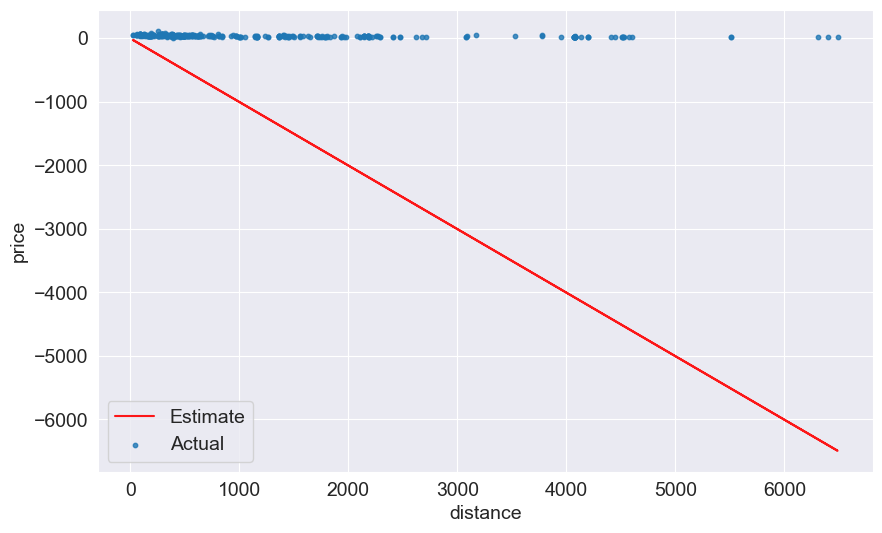

In [181]:
target = real_estate_copy_df['price_of_unit_area']

plt.plot(distance, estimated_charges, 'r', alpha=0.9);
plt.scatter(distance, target, s=10,alpha=0.8);
plt.xlabel('distance');
plt.ylabel('price')
plt.legend(['Estimate', 'Actual']);

In [182]:
def try_parameters(w, b):
   distance = real_estate_copy_df['distance_to_the_nearest_MRT_station']
   target = real_estate_copy_df['price_of_unit_area']

   estimated_charges = estimate_charges(distance, w, b)

   plt.plot(distance, estimated_charges, 'r', alpha=0.9);
   plt.scatter(distance, target, s=10,alpha=0.8);
   plt.xlabel('distance');
   plt.ylabel('price')
   plt.legend(['Estimate', 'Actual']);

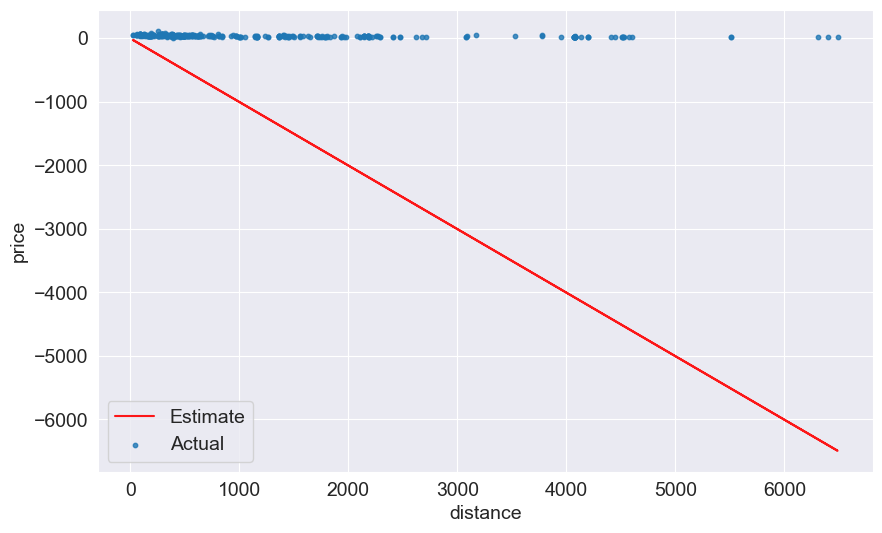

In [183]:
try_parameters(-1, -5)

### Loss/Cost Function

**Root Mean Squared Error** (RMSE)


In [184]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [185]:
distance = real_estate_copy_df['distance_to_the_nearest_MRT_station']
target = real_estate_copy_df['price_of_unit_area']
predicted = estimate_charges(distance,-1, -5)

In [186]:
rmse(target, predicted)

1684.0441033022832

 we can interpret the above number: *On average, each element in the prediction differs from the actual target by SGD1,684.

### Optimizer

Let's use the `LinearRegression` class from `scikit-learn` to find the best fit line for "distance_to_the_nearest_MRT_station" vs. "price_of_unit_area" using the Ordinary Least Squares(OLS) optimization technique.

In [187]:
from sklearn.linear_model import LinearRegression

In [188]:
EstateValuator = LinearRegression()

In [189]:
inputs = real_estate_copy_df[['distance_to_the_nearest_MRT_station']]
targets = real_estate_copy_df['price_of_unit_area']
feature_names = ['distance_to_MRT']
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (414, 1)
targes.shape : (414,)


Let's fit the model to the data.

In [190]:
EstateValuator.fit(inputs, targets)

LinearRegression()

We can now make predictions using the model. Let's try predicting the charges for the distance_to_the_nearest_MRT_station 84.87882, 4082.01500 and 561.98450

In [191]:
EstateValuator.predict(np.array([[84.87882], 
                        [4082.01500], 
                        [561.98450]]))

c:\Users\Ella\.virtualenvs\ml-pIDuFuPX\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([45.23503269, 16.20762342, 41.77026661])

Comparing 6 of the predicted prices to the target prices

In [192]:
distances = real_estate_copy_df['distance_to_the_nearest_MRT_station']
np_distance = np.array(distances).reshape(-1, 1)
# Make predictions
predictions = EstateValuator.predict(np_distance)

# Print the predicted charges
for distance, price in zip(distances, predictions):
    print(f"Distance: {distance}, Predicted Charge: {price}")
    if distance == 2175.03:
        break
for distance, price in zip(real_estate_copy_df['distance_to_the_nearest_MRT_station'], targets):
    print(f"Distance: {distance},  Charge: {price}")
    if distance == 2175.03:
        break

Distance: 84.87882, Predicted Charge: 45.23503268564737
Distance: 306.5947, Predicted Charge: 43.624920520523936
Distance: 561.9845, Predicted Charge: 41.77026661017507
Distance: 561.9845, Predicted Charge: 41.77026661017507
Distance: 390.5684, Predicted Charge: 43.01509917655694
Distance: 2175.03, Predicted Charge: 30.05624692675137
Distance: 84.87882,  Charge: 37.9
Distance: 306.5947,  Charge: 42.2
Distance: 561.9845,  Charge: 47.3
Distance: 561.9845,  Charge: 54.8
Distance: 390.5684,  Charge: 43.1
Distance: 2175.03,  Charge: 32.1


c:\Users\Ella\.virtualenvs\ml-pIDuFuPX\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



Let's compute the RMSE loss to evaluate the model.

In [193]:
rmse(targets, predictions)

10.044189842789505

The parameters of the model are stored in the `coef_` and `intercept_` properties.

In [194]:
EstateValuator.coef_

array([-0.00726205])

In [195]:
EstateValuator.intercept_

45.851427057774984

Let's visualize the line created by the above parameters.

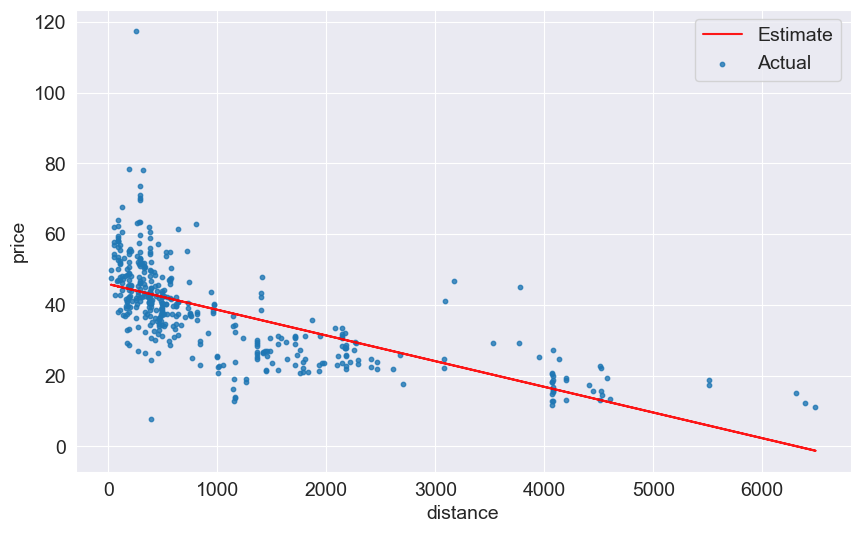

In [196]:
try_parameters(EstateValuator.coef_, EstateValuator.intercept_)

Interpretion:
The RMSE values provide insights into the average prediction errors of your models. A lower RMSE indicates better performance, with smaller deviations between the predicted values and the actual values. Therefore, the RMSE of our trained model with one feature (10.044189842789505) suggests improved accuracy compared to the base model (1684.0441033022832) through Trial and Error.

In [197]:
real_estate_copy_df.columns

Index(['house_age', 'distance_to_the_nearest_MRT_station',
       'number_of_convenience_stores', 'latitude', 'longitude',
       'price_of_unit_area'],
      dtype='object')

## Linear Regression using Multiple Features
Lets add more features and discover whether it will reduce the loss and make the model ie. EstateValuator more accurate in predicting

In [200]:
# Create inputs and targets
inputs, targets = real_estate_copy_df[['distance_to_the_nearest_MRT_station']], real_estate_copy_df['price_of_unit_area']

# Create and train the model
EstateValuator = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions =EstateValuator.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)
print(f'weight or slope : {EstateValuator.coef_}, y-intercept or bias : {EstateValuator.intercept_}', end=',')

Loss: 10.044189842789505
weight or slope : [-0.00726205], y-intercept or bias : 45.851427057774984,

### Adding house_age to the inputs

In [201]:
# Create inputs and targets
inputs, targets = real_estate_copy_df[['distance_to_the_nearest_MRT_station', 'house_age']], real_estate_copy_df['price_of_unit_area']

# Create and train the model
EstateValuator = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions =EstateValuator.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)
print(f'weight or slope : {EstateValuator.coef_}, y-intercept or bias : {EstateValuator.intercept_}', end=',')

Loss: 9.69431635750458
weight or slope : [-0.00720862 -0.23102658], y-intercept or bias : 49.885585756906636,

### Adding number_of_convenience_stores to the inputs

In [202]:
# Create inputs and targets
inputs, targets = real_estate_copy_df[['distance_to_the_nearest_MRT_station', 'house_age', 'number_of_convenience_stores']], real_estate_copy_df['price_of_unit_area']

# Create and train the model
EstateValuator = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions =EstateValuator.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)
print(f'weight or slope : {EstateValuator.coef_}, y-intercept or bias : {EstateValuator.intercept_}', end=',')

Loss: 9.206557794456211
weight or slope : [-0.00537913 -0.25285583  1.29744248], y-intercept or bias : 42.977286206064115,

### Adding latitude to the inputs

In [203]:
# Create inputs and targets
inputs, targets = real_estate_copy_df[['distance_to_the_nearest_MRT_station', 'house_age', 'number_of_convenience_stores', 'latitude']], real_estate_copy_df['price_of_unit_area']

# Create and train the model
EstateValuator = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions =EstateValuator.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)
print(f'weight or slope : {EstateValuator.coef_}, y-intercept or bias : {EstateValuator.intercept_}', end=',')

Loss: 8.89981729675844
weight or slope : [-4.17507998e-03 -2.68719175e-01  1.16478140e+00  2.38635735e+02], y-intercept or bias : -5916.006496437507,

### Adding longitude to the inputs

In [204]:
# Create inputs and targets
inputs, targets = real_estate_copy_df[['distance_to_the_nearest_MRT_station', 'house_age', 'number_of_convenience_stores', 'latitude', 'longitude']], real_estate_copy_df['price_of_unit_area']

# Create and train the model
EstateValuator = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions =EstateValuator.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)
print(f'weight or slope : {EstateValuator.coef_}, y-intercept or bias : {EstateValuator.intercept_}', end=',')

Loss: 8.899542229357026
weight or slope : [-4.25908898e-03 -2.68916833e-01  1.16302048e+00  2.37767191e+02
 -7.80545273e+00], y-intercept or bias : -4945.595113742853,

## Interpretation:
### Loss: 8.899542229357026
The loss value indicates the overall discrepancy between the predicted values and the actual values in the model.
In this case, the loss value of 8.899542229357026 suggests that, on average, the predicted values are approximately 8.899 units away from the actual values. Lower loss values indicate better model performance.

### Weight or Slope: [-4.25908898e-03, -2.68916833e-01, 1.16302048e+00, 2.37767191e+02, -7.80545273e+00]
The weights, also known as slopes or coefficients, represent the impact of each corresponding feature on the predicted target variable.
In this case, the weights indicate the influence of each feature on the real estate price prediction.
For example, a positive weight suggests that an increase in the corresponding feature value will lead to an increase in the predicted price, while a negative weight suggests the opposite.

1. distance_to_the_nearest_MRT_station = -4.25908898e-03,
2. house_age = -2.68916833e-01,
3. number_of_convenience_stores = 1.16302048e+00,
4. latitude = 2.37767191e+02,
5. longitude = -7.80545273e+00

Assuming all other features remain constant:

1. An increase in the distance from the MRT station will decrease the price by SDG 0.00. This indicates a negative correlation between the distance from the MRT station and the price. As the distance increases, the price tends to decrease.
2. An increase in the house age will decrease the price by SDG 0.27. This suggests a negative correlation between the house age and the price. As the age of the house increases, the price tends to decrease.
3. An increase in the number of convenience stores will increase the price by SDG 1.16. This indicates a positive correlation between the number of convenience stores and the price. As the number of convenience stores in the vicinity increases, the price tends to increase.
4. An increase in the latitude will increase the price by SDG 237.77. This suggests a positive correlation between the latitude and the price. As the latitude increases, indicating a more northern location, the price tends to increase.
5. An increase in the longitude will decrease the price by SDG 7.81. This indicates a negative correlation between the longitude and the price. As the longitude increases, indicating a more eastern location, the price tends to decrease.

Y-intercept or Bias: -4945.595113742853
The y-intercept or bias term represents the base value of the predicted target variable when all the features are zero.
In this case, the bias of -4945.595113742853 indicates that even when all the features have zero values, the predicted price will have an initial starting point of -4945.595113742853.